In [252]:
from pathlib import Path
import networkx as nx
import pandas as pd
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.dpi"] = 150
plt.rcParams["figure.figsize"] = (6, 4)
sns.set_style("darkgrid")

In [ ]:

OUT_DIR = Path("./outputs")

NODES_CSV = OUT_DIR / "nodes.csv"
EDGES_CSV = OUT_DIR / "edges.csv"

senate_df = pd.read_pickle("senado.pkl")
house_df = pd.read_pickle("camara.pkl")

In [223]:
# Do all prop labels follow the same format?
bill_mask = r"^(\w+)\s?([\d\w]+)\/(\d+).*$"
house_df[~house_df['prop_label'].str.fullmatch(bill_mask)]


,id_proposicao,uri_kind,author_id_num,prop_tag,auth_tag,prop_label,prop_category,auth_label,auth_category,auth_supercategory


In [224]:
groups = house_df['prop_label'].str.extract(bill_mask)
house_df['prop_label_norm'] = groups.apply(
    lambda x: f"{x[0]} {x[1]}/{x[2]}", axis=1
)
house_df

,id_proposicao,uri_kind,author_id_num,prop_tag,auth_tag,prop_label,prop_category,auth_label,auth_category,auth_supercategory,prop_label_norm
0,15009,deputados,73538,P:15009,D:73538,PL 70/1995,PL,JOSÉ DE CASTRO COIMBRA,DEPUTADO,CÂMARA,PL 70/1995
1,15532,deputados,73910,P:15532,D:73910,PL 505/1991,PL,PAULO RENATO PAIM,DEPUTADO,CÂMARA,PL 505/1991
2,15749,deputados,74316,P:15749,D:74316,PL 693/1999,PL,JOÃO HENRIQUE DE ALMEIDA SOUSA,DEPUTADO,CÂMARA,PL 693/1999
3,15990,orgaos,262,P:15990,O:262,PL 887/1991,PL,COMISSÃO MISTA,COMISSÃO,CÂMARA,PL 887/1991
4,16481,orgaos,78,P:16481,O:78,PL 1258/1995,PL,SENADO FEDERAL,SENADO,SENADO,PL 1258/1995
...,...,...,...,...,...,...,...,...,...,...,...
146414,2264373,deputados,160508,P:2264373,D:160508,PL 4943/2020,PL,AFONSO BANDEIRA FLORENCE,DEPUTADO,CÂMARA,PL 4943/2020
146415,2266069,deputados,204503,P:2266069,D:204503,PL 5384/2020,PL,ALEXANDRE ROCHA SANTOS PADILHA,DEPUTADO,CÂMARA,PL 5384/2020
146416,2266069,deputados,204501,P:2266069,D:204501,PL 5384/2020,PL,ALENCAR SANTANA BRAGA,DEPUTADO,CÂMARA,PL 5384/2020
146417,2266069,deputados,204495,P:2266069,D:204495,PL 5384/2020,PL,AIRTON LUIZ FALEIRO,DEPUTADO,CÂMARA,PL 5384/2020


In [225]:
groups = senate_df['proc_label'].str.extract(bill_mask)
senate_df['proc_label_norm'] = groups.apply(
    lambda x: f"{x[0]} {x[1]}/{x[2]}", axis=1
)
senate_df

,id_processo,id_ente,descricao_tipo,sigla_ente,sigla_tipo,auth_tag,auth_category,auth_supercategory,auth_label,identificacao,identificacao_processo_inicial,proc_tag,proc_label,proc_category,proc_label_norm
0,2526458,55126,PRESIDENTE_REPUBLICA,PR,PRESIDENTE_REPUBLICA,O:55126,PR,PR,Presidência da República,MPV 2224/2001,MPV 2224/2001,P:2526458,MPV 2224/2001,MP,MPV 2224/2001
1,663587,1,SENADOR,SF,SENADOR,S:825,SF,SF,Paulo Paim,PLS 169/2005,PLS 169/2005,P:663587,PLS 169/2005,PL,PLS 169/2005
3,2978567,1,SENADOR,SF,SENADOR,S:825,SF,SF,Paulo Paim,PLS 214/2007,PLS 214/2007,P:2978567,PLS 214/2007,PL,PLS 214/2007
4,2968939,1,SENADOR,SF,SENADOR,S:825,SF,SF,Paulo Paim,PLS 413/2008,PLS 413/2008,P:2968939,PLS 413/2008,PL,PLS 413/2008
5,2970890,1,SENADOR,SF,SENADOR,S:945,SF,SF,Alvaro Dias,PLS 260/2008,PLS 260/2008,P:2970890,PLS 260/2008,PL,PLS 260/2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36437,8730961,1,SENADOR,SF,SENADOR,S:6335,SF,SF,Damares Alves,PEC 36/2024,PEC 36/2024,P:8730961,PEC 36/2024,PEC,PEC 36/2024
36447,8730961,1,SENADOR,SF,SENADOR,S:5502,SF,SF,Plínio Valério,PEC 36/2024,PEC 36/2024,P:8730961,PEC 36/2024,PEC,PEC 36/2024
36457,8730961,1,SENADOR,SF,SENADOR,S:6341,SF,SF,Hamilton Mourão,PEC 36/2024,PEC 36/2024,P:8730961,PEC 36/2024,PEC,PEC 36/2024
36467,8730961,1,SENADOR,SF,SENADOR,S:6009,SF,SF,Astronauta Marcos Pontes,PEC 36/2024,PEC 36/2024,P:8730961,PEC 36/2024,PEC,PEC 36/2024


In [226]:
house_df['prop_year'] = house_df['prop_label_norm'].apply(lambda v: int(v.split("/")[-1]))
house_df = house_df[house_df['prop_year'] >= 2019].copy()
def normalize_house_supercat(v):
    match v:
        case 'CÂMARA':
            return 'CD'
        case 'PRESIDÊNCIA DA REPÚBLICA':
            return 'PR'
        case 'SENADO':
            return 'SF'
        case 'OUTROS':
            return 'OTH'
    assert False
    
house_df['auth_supercategory'] = house_df['auth_supercategory'].apply(normalize_house_supercat)

house_df = house_df[[
    'prop_tag',
    'prop_label_norm',
    'auth_tag',
    'auth_label',
    'auth_supercategory',
]].copy()
# we take the supercategory as the category
house_df.columns = "prop_tag_house prop_label auth_tag_house auth_label_house auth_category_house".split()
house_df

,prop_tag_house,prop_label,auth_tag_house,auth_label_house,auth_category_house
461,P:538196,PL 6610/2019,D:160655,RICARDO IZAR JUNIOR,CD
544,P:559138,PL 6606/2019,D:141488,LUIZ PAULO TEIXEIRA FERREIRA,CD
646,P:593065,PL 4476/2020,D:73584,ANTONIO CARLOS DE MENDES THAME,CD
686,P:601739,PL 6054/2019,D:160518,WELITON FERNANDES PRADO,CD
743,P:614512,PL 4157/2019,D:151208,LAERCIO JOSÉ DE OLIVEIRA,CD
...,...,...,...,...,...
146414,P:2264373,PL 4943/2020,D:160508,AFONSO BANDEIRA FLORENCE,CD
146415,P:2266069,PL 5384/2020,D:204503,ALEXANDRE ROCHA SANTOS PADILHA,CD
146416,P:2266069,PL 5384/2020,D:204501,ALENCAR SANTANA BRAGA,CD
146417,P:2266069,PL 5384/2020,D:204495,AIRTON LUIZ FALEIRO,CD


In [227]:
senate_df['proc_year'] = senate_df['proc_label_norm'].apply(lambda v: int(v.split("/")[-1]))
senate_df = senate_df[senate_df['proc_year'] >= 2019].copy()

senate_df = senate_df[[
    'proc_tag',
    'proc_label_norm',    
    'auth_tag',
    'auth_label',
    'auth_supercategory',
]].copy()
# we take the supercategory as the category
senate_df.columns = "prop_tag_senate prop_label auth_tag_senate auth_label_senate auth_category_senate".split()
senate_df

,prop_tag_senate,prop_label,auth_tag_senate,auth_label_senate,auth_category_senate
1953,P:7707848,PL 397/2019,O:2,Câmara dos Deputados,CD
1954,P:7707853,PL 398/2019,O:2,Câmara dos Deputados,CD
1955,P:7707858,PL 399/2019,O:2,Câmara dos Deputados,CD
1956,P:7707883,PL 405/2019,O:2,Câmara dos Deputados,CD
1957,P:7707898,PL 408/2019,O:2,Câmara dos Deputados,CD
...,...,...,...,...,...
36437,P:8730961,PEC 36/2024,S:6335,Damares Alves,SF
36447,P:8730961,PEC 36/2024,S:5502,Plínio Valério,SF
36457,P:8730961,PEC 36/2024,S:6341,Hamilton Mourão,SF
36467,P:8730961,PEC 36/2024,S:6009,Astronauta Marcos Pontes,SF


In [228]:
df = pd.merge(
    house_df,
    senate_df,
    left_on="prop_label",
    right_on="prop_label",
    how="outer",
)
df = df[[
    'prop_label',
    'prop_tag_house',
    'auth_tag_house',
    'auth_label_house',
    'auth_category_house',
    'prop_tag_senate',
    'auth_tag_senate',
    'auth_label_senate',
    'auth_category_senate',
]]
df = df.fillna("<AUSENTE>")
df

,prop_label,prop_tag_house,auth_tag_house,auth_label_house,auth_category_house,prop_tag_senate,auth_tag_senate,auth_label_senate,auth_category_senate
0,MPV 1000/2020,P:2262062,O:253,PODER EXECUTIVO,PR,P:7979012,O:55126,Presidência da República,PR
1,MPV 1001/2020,P:2262906,O:253,PODER EXECUTIVO,PR,P:7983532,O:55126,Presidência da República,PR
2,MPV 1002/2020,P:2263381,O:253,PODER EXECUTIVO,PR,P:7987460,O:55126,Presidência da República,PR
3,MPV 1003/2020,P:2263410,O:253,PODER EXECUTIVO,PR,P:7987889,O:55126,Presidência da República,PR
4,MPV 1004/2020,P:2263411,O:253,PODER EXECUTIVO,PR,P:7987895,O:55126,Presidência da República,PR
...,...,...,...,...,...,...,...,...,...
55289,PLV 8/2023,P:2354532,D:204355,JOSIAS MARIO DA VITORIA,CD,<AUSENTE>,<AUSENTE>,<AUSENTE>,<AUSENTE>
55290,PLV 9/2020,P:2250966,D:141531,RODRIGO BATISTA DE CASTRO,CD,<AUSENTE>,<AUSENTE>,<AUSENTE>,<AUSENTE>
55291,PLV 9/2021,P:2284649,D:204569,PABLO OLIVA SOUZA,CD,<AUSENTE>,<AUSENTE>,<AUSENTE>,<AUSENTE>
55292,PLV 9/2022,P:2322707,D:178881,ALUISIO GUIMARAES MENDES FILHO,CD,<AUSENTE>,<AUSENTE>,<AUSENTE>,<AUSENTE>


In [229]:
# We generate DFs for the unique nodes and unify the tags

props_df = df[['prop_label', 'prop_tag_house', 'prop_tag_senate']].drop_duplicates()
props_df = props_df.reset_index(drop=True)
props_df['prop_tag'] = props_df.index.map(lambda v: f"UP:{v}")
props_df = props_df.set_index('prop_tag', drop=True)
props_df


,prop_label,prop_tag_house,prop_tag_senate
prop_tag,,,
UP:0,MPV 1000/2020,P:2262062,P:7979012
UP:1,MPV 1001/2020,P:2262906,P:7983532
UP:2,MPV 1002/2020,P:2263381,P:7987460
UP:3,MPV 1003/2020,P:2263410,P:7987889
UP:4,MPV 1004/2020,P:2263411,P:7987895
...,...,...,...
UP:28324,PLV 8/2023,P:2354532,<AUSENTE>
UP:28325,PLV 9/2020,P:2250966,<AUSENTE>
UP:28326,PLV 9/2021,P:2284649,<AUSENTE>


In [230]:
auths_df = df[['auth_tag_house', 'auth_label_house', 'auth_tag_senate', 'auth_label_senate']].drop_duplicates()
auths_df = auths_df.reset_index(drop=True)
auths_df['auth_tag'] = auths_df.index.map(lambda v: f"UA:{v}")
auths_df = auths_df.set_index('auth_tag', drop=True)
auths_df

,auth_tag_house,auth_label_house,auth_tag_senate,auth_label_senate
auth_tag,,,,
UA:0,O:253,PODER EXECUTIVO,O:55126,Presidência da República
UA:1,O:253,PODER EXECUTIVO,O:7352682,Forum Nacional de Comitês Hidrográficas Brasil
UA:2,O:253,PODER EXECUTIVO,<AUSENTE>,<AUSENTE>
UA:3,O:78,SENADO FEDERAL,S:3396,Tasso Jereissati
UA:4,O:78,SENADO FEDERAL,S:374,Paulo Rocha
...,...,...,...,...
UA:1859,O:102642,COMISSÃO MISTA DA MPV 1174/2023,<AUSENTE>,<AUSENTE>
UA:1860,O:102211,COMISSÃO MISTA DA MPV 899/2019,<AUSENTE>,<AUSENTE>
UA:1861,O:102210,COMISSÃO MISTA DA MPV 898/2019,<AUSENTE>,<AUSENTE>


In [231]:
nodes_df = pd.concat([props_df, auths_df]).drop_duplicates()
nodes_df

,prop_label,prop_tag_house,prop_tag_senate,auth_tag_house,auth_label_house,auth_tag_senate,auth_label_senate
UP:0,MPV 1000/2020,P:2262062,P:7979012,NaN,NaN,NaN,NaN
UP:1,MPV 1001/2020,P:2262906,P:7983532,NaN,NaN,NaN,NaN
UP:2,MPV 1002/2020,P:2263381,P:7987460,NaN,NaN,NaN,NaN
UP:3,MPV 1003/2020,P:2263410,P:7987889,NaN,NaN,NaN,NaN
UP:4,MPV 1004/2020,P:2263411,P:7987895,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
UA:1859,NaN,NaN,NaN,O:102642,COMISSÃO MISTA DA MPV 1174/2023,<AUSENTE>,<AUSENTE>
UA:1860,NaN,NaN,NaN,O:102211,COMISSÃO MISTA DA MPV 899/2019,<AUSENTE>,<AUSENTE>
UA:1861,NaN,NaN,NaN,O:102210,COMISSÃO MISTA DA MPV 898/2019,<AUSENTE>,<AUSENTE>
UA:1862,NaN,NaN,NaN,O:102220,COMISSÃO MISTA DA MPV 905/2019,<AUSENTE>,<AUSENTE>


In [232]:
def get_auth_tag(row: pd.Series) -> str:
    return nodes_df.loc[
        (nodes_df['auth_tag_house'] == row['auth_tag_house'])
        &(nodes_df['auth_tag_senate'] == row['auth_tag_senate'])
    ]

In [233]:
edges_df = df.copy()
edges_df['prop_tag'] = None
edges_df['auth_tag'] = None
edges_df.head()

,prop_label,prop_tag_house,auth_tag_house,auth_label_house,auth_category_house,prop_tag_senate,auth_tag_senate,auth_label_senate,auth_category_senate,prop_tag,auth_tag
0,MPV 1000/2020,P:2262062,O:253,PODER EXECUTIVO,PR,P:7979012,O:55126,Presidência da República,PR,None,None
1,MPV 1001/2020,P:2262906,O:253,PODER EXECUTIVO,PR,P:7983532,O:55126,Presidência da República,PR,None,None
2,MPV 1002/2020,P:2263381,O:253,PODER EXECUTIVO,PR,P:7987460,O:55126,Presidência da República,PR,None,None
3,MPV 1003/2020,P:2263410,O:253,PODER EXECUTIVO,PR,P:7987889,O:55126,Presidência da República,PR,None,None
4,MPV 1004/2020,P:2263411,O:253,PODER EXECUTIVO,PR,P:7987895,O:55126,Presidência da República,PR,None,None


In [234]:
nodes_idx = nodes_df.reset_index().rename(columns={'index': 'node_id'})
nodes_idx

,node_id,prop_label,prop_tag_house,prop_tag_senate,auth_tag_house,auth_label_house,auth_tag_senate,auth_label_senate
0,UP:0,MPV 1000/2020,P:2262062,P:7979012,NaN,NaN,NaN,NaN
1,UP:1,MPV 1001/2020,P:2262906,P:7983532,NaN,NaN,NaN,NaN
2,UP:2,MPV 1002/2020,P:2263381,P:7987460,NaN,NaN,NaN,NaN
3,UP:3,MPV 1003/2020,P:2263410,P:7987889,NaN,NaN,NaN,NaN
4,UP:4,MPV 1004/2020,P:2263411,P:7987895,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
30188,UA:1859,NaN,NaN,NaN,O:102642,COMISSÃO MISTA DA MPV 1174/2023,<AUSENTE>,<AUSENTE>
30189,UA:1860,NaN,NaN,NaN,O:102211,COMISSÃO MISTA DA MPV 899/2019,<AUSENTE>,<AUSENTE>
30190,UA:1861,NaN,NaN,NaN,O:102210,COMISSÃO MISTA DA MPV 898/2019,<AUSENTE>,<AUSENTE>
30191,UA:1862,NaN,NaN,NaN,O:102220,COMISSÃO MISTA DA MPV 905/2019,<AUSENTE>,<AUSENTE>


In [235]:
prop_index_map = (
    nodes_idx.dropna(subset=["prop_label"])
             .drop_duplicates(subset=["prop_label"])
             .set_index("prop_label")["node_id"]
)
prop_index_map

prop_label
MPV 1000/2020        UP:0
MPV 1001/2020        UP:1
MPV 1002/2020        UP:2
MPV 1003/2020        UP:3
MPV 1004/2020        UP:4
                   ...   
PLV 8/2023       UP:28324
PLV 9/2020       UP:28325
PLV 9/2021       UP:28326
PLV 9/2022       UP:28327
PLV 9/2023       UP:28328
Name: node_id, Length: 28326, dtype: object

In [236]:

edges_df["prop_tag"] = edges_df["prop_label"].map(prop_index_map)
edges_df

,prop_label,prop_tag_house,auth_tag_house,auth_label_house,auth_category_house,prop_tag_senate,auth_tag_senate,auth_label_senate,auth_category_senate,prop_tag,auth_tag
0,MPV 1000/2020,P:2262062,O:253,PODER EXECUTIVO,PR,P:7979012,O:55126,Presidência da República,PR,UP:0,None
1,MPV 1001/2020,P:2262906,O:253,PODER EXECUTIVO,PR,P:7983532,O:55126,Presidência da República,PR,UP:1,None
2,MPV 1002/2020,P:2263381,O:253,PODER EXECUTIVO,PR,P:7987460,O:55126,Presidência da República,PR,UP:2,None
3,MPV 1003/2020,P:2263410,O:253,PODER EXECUTIVO,PR,P:7987889,O:55126,Presidência da República,PR,UP:3,None
4,MPV 1004/2020,P:2263411,O:253,PODER EXECUTIVO,PR,P:7987895,O:55126,Presidência da República,PR,UP:4,None
...,...,...,...,...,...,...,...,...,...,...,...
55289,PLV 8/2023,P:2354532,D:204355,JOSIAS MARIO DA VITORIA,CD,<AUSENTE>,<AUSENTE>,<AUSENTE>,<AUSENTE>,UP:28324,None
55290,PLV 9/2020,P:2250966,D:141531,RODRIGO BATISTA DE CASTRO,CD,<AUSENTE>,<AUSENTE>,<AUSENTE>,<AUSENTE>,UP:28325,None
55291,PLV 9/2021,P:2284649,D:204569,PABLO OLIVA SOUZA,CD,<AUSENTE>,<AUSENTE>,<AUSENTE>,<AUSENTE>,UP:28326,None
55292,PLV 9/2022,P:2322707,D:178881,ALUISIO GUIMARAES MENDES FILHO,CD,<AUSENTE>,<AUSENTE>,<AUSENTE>,<AUSENTE>,UP:28327,None


In [237]:
SENTINEL = "__NA__"
def keyify(df):
    return (
        df["auth_tag_house"].fillna(SENTINEL).astype(str)
        + "|" +
        df["auth_tag_senate"].fillna(SENTINEL).astype(str)
    )

nodes_idx["auth_key"] = keyify(nodes_idx)
nodes_idx

,node_id,prop_label,prop_tag_house,prop_tag_senate,auth_tag_house,auth_label_house,auth_tag_senate,auth_label_senate,auth_key
0,UP:0,MPV 1000/2020,P:2262062,P:7979012,NaN,NaN,NaN,NaN,__NA__|__NA__
1,UP:1,MPV 1001/2020,P:2262906,P:7983532,NaN,NaN,NaN,NaN,__NA__|__NA__
2,UP:2,MPV 1002/2020,P:2263381,P:7987460,NaN,NaN,NaN,NaN,__NA__|__NA__
3,UP:3,MPV 1003/2020,P:2263410,P:7987889,NaN,NaN,NaN,NaN,__NA__|__NA__
4,UP:4,MPV 1004/2020,P:2263411,P:7987895,NaN,NaN,NaN,NaN,__NA__|__NA__
...,...,...,...,...,...,...,...,...,...
30188,UA:1859,NaN,NaN,NaN,O:102642,COMISSÃO MISTA DA MPV 1174/2023,<AUSENTE>,<AUSENTE>,O:102642|<AUSENTE>
30189,UA:1860,NaN,NaN,NaN,O:102211,COMISSÃO MISTA DA MPV 899/2019,<AUSENTE>,<AUSENTE>,O:102211|<AUSENTE>
30190,UA:1861,NaN,NaN,NaN,O:102210,COMISSÃO MISTA DA MPV 898/2019,<AUSENTE>,<AUSENTE>,O:102210|<AUSENTE>
30191,UA:1862,NaN,NaN,NaN,O:102220,COMISSÃO MISTA DA MPV 905/2019,<AUSENTE>,<AUSENTE>,O:102220|<AUSENTE>


In [238]:
edges_df["auth_key"] = keyify(edges_df)

In [239]:
auth_index_map = (
    nodes_idx.dropna(subset=["auth_key"])
             .drop_duplicates(subset=["auth_key"])
             .set_index("auth_key")["node_id"]
)

auth_index_map

auth_key
__NA__|__NA__            UP:0
O:253|O:55126            UA:0
O:253|O:7352682          UA:1
O:253|<AUSENTE>          UA:2
O:78|S:3396              UA:3
                       ...   
O:102642|<AUSENTE>    UA:1859
O:102211|<AUSENTE>    UA:1860
O:102210|<AUSENTE>    UA:1861
O:102220|<AUSENTE>    UA:1862
O:102594|<AUSENTE>    UA:1863
Name: node_id, Length: 1865, dtype: object

In [240]:
edges_df["auth_tag"] = edges_df["auth_key"].map(auth_index_map)
edges_df

,prop_label,prop_tag_house,auth_tag_house,auth_label_house,auth_category_house,prop_tag_senate,auth_tag_senate,auth_label_senate,auth_category_senate,prop_tag,auth_tag,auth_key
0,MPV 1000/2020,P:2262062,O:253,PODER EXECUTIVO,PR,P:7979012,O:55126,Presidência da República,PR,UP:0,UA:0,O:253|O:55126
1,MPV 1001/2020,P:2262906,O:253,PODER EXECUTIVO,PR,P:7983532,O:55126,Presidência da República,PR,UP:1,UA:0,O:253|O:55126
2,MPV 1002/2020,P:2263381,O:253,PODER EXECUTIVO,PR,P:7987460,O:55126,Presidência da República,PR,UP:2,UA:0,O:253|O:55126
3,MPV 1003/2020,P:2263410,O:253,PODER EXECUTIVO,PR,P:7987889,O:55126,Presidência da República,PR,UP:3,UA:0,O:253|O:55126
4,MPV 1004/2020,P:2263411,O:253,PODER EXECUTIVO,PR,P:7987895,O:55126,Presidência da República,PR,UP:4,UA:0,O:253|O:55126
...,...,...,...,...,...,...,...,...,...,...,...,...
55289,PLV 8/2023,P:2354532,D:204355,JOSIAS MARIO DA VITORIA,CD,<AUSENTE>,<AUSENTE>,<AUSENTE>,<AUSENTE>,UP:28324,UA:596,D:204355|<AUSENTE>
55290,PLV 9/2020,P:2250966,D:141531,RODRIGO BATISTA DE CASTRO,CD,<AUSENTE>,<AUSENTE>,<AUSENTE>,<AUSENTE>,UP:28325,UA:529,D:141531|<AUSENTE>
55291,PLV 9/2021,P:2284649,D:204569,PABLO OLIVA SOUZA,CD,<AUSENTE>,<AUSENTE>,<AUSENTE>,<AUSENTE>,UP:28326,UA:779,D:204569|<AUSENTE>
55292,PLV 9/2022,P:2322707,D:178881,ALUISIO GUIMARAES MENDES FILHO,CD,<AUSENTE>,<AUSENTE>,<AUSENTE>,<AUSENTE>,UP:28327,UA:616,D:178881|<AUSENTE>


In [241]:
edges_df.drop(columns=["auth_key"], inplace=True)

In [242]:
edges_df

,prop_label,prop_tag_house,auth_tag_house,auth_label_house,auth_category_house,prop_tag_senate,auth_tag_senate,auth_label_senate,auth_category_senate,prop_tag,auth_tag
0,MPV 1000/2020,P:2262062,O:253,PODER EXECUTIVO,PR,P:7979012,O:55126,Presidência da República,PR,UP:0,UA:0
1,MPV 1001/2020,P:2262906,O:253,PODER EXECUTIVO,PR,P:7983532,O:55126,Presidência da República,PR,UP:1,UA:0
2,MPV 1002/2020,P:2263381,O:253,PODER EXECUTIVO,PR,P:7987460,O:55126,Presidência da República,PR,UP:2,UA:0
3,MPV 1003/2020,P:2263410,O:253,PODER EXECUTIVO,PR,P:7987889,O:55126,Presidência da República,PR,UP:3,UA:0
4,MPV 1004/2020,P:2263411,O:253,PODER EXECUTIVO,PR,P:7987895,O:55126,Presidência da República,PR,UP:4,UA:0
...,...,...,...,...,...,...,...,...,...,...,...
55289,PLV 8/2023,P:2354532,D:204355,JOSIAS MARIO DA VITORIA,CD,<AUSENTE>,<AUSENTE>,<AUSENTE>,<AUSENTE>,UP:28324,UA:596
55290,PLV 9/2020,P:2250966,D:141531,RODRIGO BATISTA DE CASTRO,CD,<AUSENTE>,<AUSENTE>,<AUSENTE>,<AUSENTE>,UP:28325,UA:529
55291,PLV 9/2021,P:2284649,D:204569,PABLO OLIVA SOUZA,CD,<AUSENTE>,<AUSENTE>,<AUSENTE>,<AUSENTE>,UP:28326,UA:779
55292,PLV 9/2022,P:2322707,D:178881,ALUISIO GUIMARAES MENDES FILHO,CD,<AUSENTE>,<AUSENTE>,<AUSENTE>,<AUSENTE>,UP:28327,UA:616


In [243]:
edges_df = edges_df[['prop_tag', 'auth_tag']]
edges_df.to_csv(EDGES_CSV, index=False)

In [244]:
nodes_df = nodes_df.reset_index().rename(columns={'index': 'node_tag'})
nodes_df.to_csv(NODES_CSV, index=False)


In [246]:
G = nx.Graph()
for _, row in nodes_df.iterrows():
    G.add_node(
        row['node_tag'],
        **{k: v for k, v in row.items() if k != 'node_tag'}
    )

In [247]:
for _, row in edges_df.iterrows():
    G.add_edge(
        row['prop_tag'],
        row['auth_tag']
    )

In [249]:
G.number_of_nodes(), G.number_of_edges()

(30193, 55294)

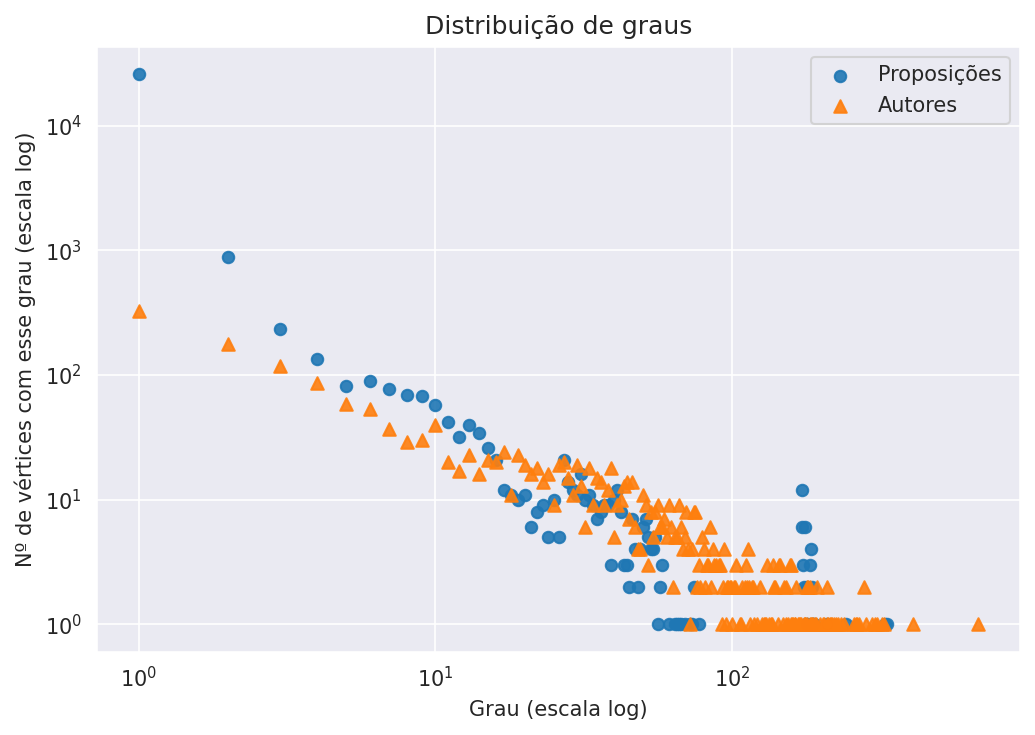

In [284]:
bill_nodes   = [n for n, d in G.nodes(data=True) if n.startswith("UP")]
author_nodes = [n for n, d in G.nodes(data=True) if n.startswith("UA")]

deg_bills   = Counter(dict(G.degree(bill_nodes)).values())
deg_authors = Counter(dict(G.degree(author_nodes)).values())

xs_b = sorted(deg_bills.keys())
ys_b = [deg_bills[x] for x in xs_b]

xs_a = sorted(deg_authors.keys())
ys_a = [deg_authors[x] for x in xs_a]


plt.figure(figsize=(7,5))

# Bills: circles
plt.scatter(xs_b, ys_b, marker="o", s=30, alpha=0.9, label="Proposições")

# Authors: triangles
plt.scatter(xs_a, ys_a, marker="^", s=36, alpha=0.9, label="Autores")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Grau (escala log)")
plt.ylabel("Nº de vértices com esse grau (escala log)")
plt.title("Distribuição de graus")
plt.legend()
plt.tight_layout()
plt.show()


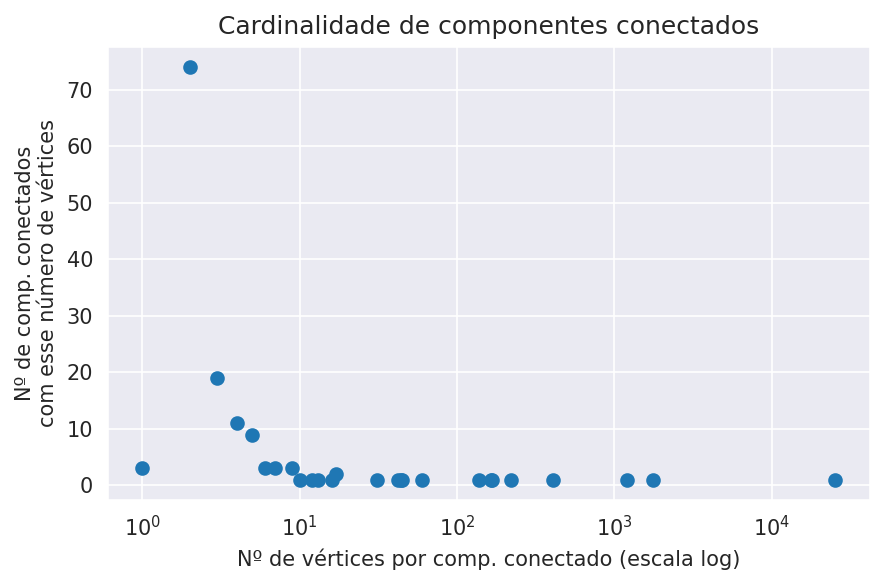

In [262]:
ccs = list(nx.connected_components(G))
cc_sizes = [len(cc) for cc in ccs]
cc_size_dist = Counter(cc_sizes)
xs = sorted(cc_size_dist.keys())
ys = [cc_size_dist[x] for x in xs]
plt.figure(figsize=(6,4))
plt.scatter(xs, ys)
plt.xlabel("Nº de vértices por comp. conectado (escala log)")
plt.ylabel("Nº de comp. conectados\ncom esse número de vértices")
plt.xscale("log")
# plt.yscale("log")
plt.title("Cardinalidade de componentes conectados")
plt.tight_layout()
plt.show()

In [263]:
V = G.number_of_nodes()
E = G.number_of_edges()
k = 2 * E / V
print(f"|V| = {V}")
print(f"|E| = {E}")
print(f"<k> = {k}")
print(f"ccs = {len(ccs)}")

|V| = 30193
|E| = 55294
<k> = 3.662703275593681
ccs = 144


In [264]:
nodes_df.to_pickle(OUT_DIR / "nodes_df.pkl")
edges_df.to_pickle(OUT_DIR / "edges_df.pkl")

In [266]:
nodes_df

,node_tag,prop_label,prop_tag_house,prop_tag_senate,auth_tag_house,auth_label_house,auth_tag_senate,auth_label_senate
0,UP:0,MPV 1000/2020,P:2262062,P:7979012,NaN,NaN,NaN,NaN
1,UP:1,MPV 1001/2020,P:2262906,P:7983532,NaN,NaN,NaN,NaN
2,UP:2,MPV 1002/2020,P:2263381,P:7987460,NaN,NaN,NaN,NaN
3,UP:3,MPV 1003/2020,P:2263410,P:7987889,NaN,NaN,NaN,NaN
4,UP:4,MPV 1004/2020,P:2263411,P:7987895,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
30188,UA:1859,NaN,NaN,NaN,O:102642,COMISSÃO MISTA DA MPV 1174/2023,<AUSENTE>,<AUSENTE>
30189,UA:1860,NaN,NaN,NaN,O:102211,COMISSÃO MISTA DA MPV 899/2019,<AUSENTE>,<AUSENTE>
30190,UA:1861,NaN,NaN,NaN,O:102210,COMISSÃO MISTA DA MPV 898/2019,<AUSENTE>,<AUSENTE>
30191,UA:1862,NaN,NaN,NaN,O:102220,COMISSÃO MISTA DA MPV 905/2019,<AUSENTE>,<AUSENTE>


In [267]:
props_df


,prop_label,prop_tag_house,prop_tag_senate
prop_tag,,,
UP:0,MPV 1000/2020,P:2262062,P:7979012
UP:1,MPV 1001/2020,P:2262906,P:7983532
UP:2,MPV 1002/2020,P:2263381,P:7987460
UP:3,MPV 1003/2020,P:2263410,P:7987889
UP:4,MPV 1004/2020,P:2263411,P:7987895
...,...,...,...
UP:28324,PLV 8/2023,P:2354532,<AUSENTE>
UP:28325,PLV 9/2020,P:2250966,<AUSENTE>
UP:28326,PLV 9/2021,P:2284649,<AUSENTE>


In [270]:
props_dedup_df = df[['prop_label', 'auth_category_house', 'auth_category_senate']].drop_duplicates()
props_dedup_df

,prop_label,auth_category_house,auth_category_senate
0,MPV 1000/2020,PR,PR
1,MPV 1001/2020,PR,PR
2,MPV 1002/2020,PR,PR
3,MPV 1003/2020,PR,PR
4,MPV 1004/2020,PR,PR
...,...,...,...
55289,PLV 8/2023,CD,<AUSENTE>
55290,PLV 9/2020,CD,<AUSENTE>
55291,PLV 9/2021,CD,<AUSENTE>
55292,PLV 9/2022,CD,<AUSENTE>


In [271]:
def unify_cat(row: pd.Series) -> str:
    assert row['auth_category_house'] != "<AUSENTE>" or row['auth_category_senate'] != "<AUSENTE>"
    if row['auth_category_house'] == "<AUSENTE>":
        return row['auth_category_senate']
    return row['auth_category_house']

In [273]:
props_dedup_df['auth_category'] = props_dedup_df.apply(unify_cat, axis=1)
props_dedup_df

,prop_label,auth_category_house,auth_category_senate,auth_category
0,MPV 1000/2020,PR,PR,PR
1,MPV 1001/2020,PR,PR,PR
2,MPV 1002/2020,PR,PR,PR
3,MPV 1003/2020,PR,PR,PR
4,MPV 1004/2020,PR,PR,PR
...,...,...,...,...
55289,PLV 8/2023,CD,<AUSENTE>,CD
55290,PLV 9/2020,CD,<AUSENTE>,CD
55291,PLV 9/2021,CD,<AUSENTE>,CD
55292,PLV 9/2022,CD,<AUSENTE>,CD


In [278]:
props_dedup_df['prop_category'] = props_dedup_df['prop_label'].apply(lambda s: s.split()[0][:2])
props_dedup_df


,prop_label,auth_category_house,auth_category_senate,auth_category,prop_category
0,MPV 1000/2020,PR,PR,PR,MP
1,MPV 1001/2020,PR,PR,PR,MP
2,MPV 1002/2020,PR,PR,PR,MP
3,MPV 1003/2020,PR,PR,PR,MP
4,MPV 1004/2020,PR,PR,PR,MP
...,...,...,...,...,...
55289,PLV 8/2023,CD,<AUSENTE>,CD,PL
55290,PLV 9/2020,CD,<AUSENTE>,CD,PL
55291,PLV 9/2021,CD,<AUSENTE>,CD,PL
55292,PLV 9/2022,CD,<AUSENTE>,CD,PL


In [279]:

pd.crosstab(props_dedup_df['auth_category'], props_dedup_df['prop_category'])

prop_category,MP,PE,PL
auth_category,,,
CD,0,122,25409
OTH,0,0,39
PR,401,4,351
SF,0,86,1921


In [281]:
props_dedup_df.value_counts('prop_category')

prop_category
PL    27720
MP      401
PE      212
Name: count, dtype: int64

In [282]:
len(props_dedup_df)

28333

In [283]:
len(auths_df)

1864